
This 2007 to 2012 data for the Nairobi Securities Exchange (NSE) was scrapped from a public website that publishes daily stock prices and archives historical data [3].  The raw data was first exported to a spreadsheet then headers, footers and other unnecessary elements were removed.  This data consists of daily stock prices for over 60 different stocks and market indices over a 12-month period in each year, for a total of 6-years.  Each data row has the following 13 data columns (1) Date of trade (2) Code of the stock (3) Name of the stock (4) 12-month Low price (5) 12-month High price (6) Day's Low price (7) Day's High price (8) Day's Final Price (9) Previous traded price (10) Change in price by value (11) Change in price by % (12) Volume traded (13) Adjusted price, if any. 

In [33]:
#import dependencies

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [34]:
#load the files
directory = 'data\\Nairobi Securities Exchange All Stocks Prices 2007-2012'
dfs = []

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        #read the excel file and store the dataframe in the list
        df = pd.read_csv(file_path)
        dfs.append(df)



In [35]:
for df in dfs:
    df.columns = df.columns.str.lower()
stocks_df = pd.concat(dfs, ignore_index= True)
stocks_df

,date,code,name,12m low,12m high,day low,day high,day price,previous,change,change%,volume,adjust,adjusted
0,01/02/2007,EGAD,Eaagads,22,57,52,52,52,52,-,-,300,26,NaN
1,01/02/2007,KAPC,Kapchorua Tea,111,148,100,100,100,98.5,1.5,1.50%,"7,800",-,NaN
2,01/02/2007,KUKZ,Kakuzi,67.5,89,42.5,45,43.5,42.25,1.25,2.87%,"2,700",-,NaN
3,01/02/2007,REA,Rea Vipingo Plantations,14.5,23.5,25,26.5,25.5,25.75,-0.25,0.98%,"10,500",-,NaN
4,01/02/2007,SASN,Sasini Tea and Coffee,10.5,13.6,140,145,140,141,-1,0.71%,"70,900",23.33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81499,12/31/2012,REA,Rea Vipingo Plantations,14.5,23.5,19,19,19,19,-,-,"1,000",-,NaN
81500,12/31/2012,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,NaN
81501,12/31/2012,KUKZ,Kakuzi,67.5,89,72,72,72,69,3,4.17%,"1,000",-,NaN
81502,12/31/2012,KAPC,Kapchorua Tea,111,148,118,118,118,118,-,-,100,-,NaN


## Data Preprocessing

In [36]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       81504 non-null  object
 1   code       81504 non-null  object
 2   name       81456 non-null  object
 3   12m low    81504 non-null  object
 4   12m high   81504 non-null  object
 5   day low    81504 non-null  object
 6   day high   81504 non-null  object
 7   day price  81504 non-null  object
 8   previous   81504 non-null  object
 9   change     81504 non-null  object
 10  change%    81504 non-null  object
 11  volume     81504 non-null  object
 12  adjust     70921 non-null  object
 13  adjusted   10583 non-null  object
dtypes: object(14)
memory usage: 8.7+ MB


In [37]:
#convert columns to numeric 
numeric_columns = ["12m low","12m high","day low","day high","day price", "previous", "change", "volume"]
for column in numeric_columns:
    stocks_df[column] = stocks_df[column].replace({',': '', '-': '0', '_': '0'}, regex=True).astype("float32") #replace commas and hyphens with 0 and convert to float
    stocks_df[column] = pd.to_numeric(stocks_df[column]) #convert to numeric

In [38]:
#check for null values
print(stocks_df.isna().sum())



date             0
code             0
name            48
12m low          0
12m high         0
day low          0
day high         0
day price        0
previous         0
change           0
change%          0
volume           0
adjust       10583
adjusted     70921
dtype: int64


In [39]:
# check values in name column and showw all of them
name_counts = stocks_df['name'].value_counts()
print(name_counts.to_string())

name
Eveready East Africa                    1501
KenGen                                  1501
Kenya Commercial Bank                   1501
Mumias Sugar                            1501
Housing Finance                         1501
Sasini Tea and Coffee                   1500
Kenya Airways                           1500
Equity Bank                             1500
ScanGroup                               1500
Centum Investment                       1500
E.A.Cables                              1500
NIC Bank                                1500
Standard Chartered Bank                 1500
Barclays Bank                           1500
CMC Holdings                            1500
Athi River Mining                       1499
Nation Media Group                      1499
East African Breweries                  1499
National Bank of Kenya                  1499
Kenya Power and Lighting                1498
Total Kenya                             1497
Sameer Africa                           1497
TPS E

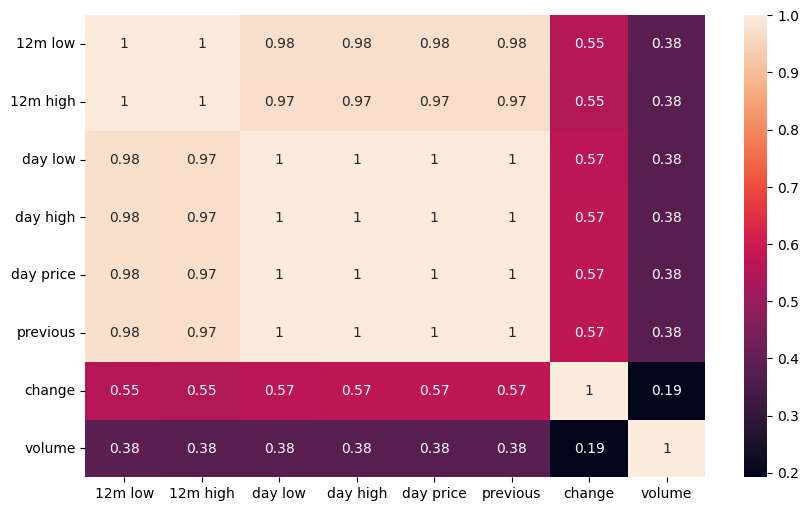

In [40]:
#plot a heatmap to view the correlations of the columns
corr = stocks_df[numeric_columns].corr() #get the correlation of the columns
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True) 
plt.show()

In [41]:
#drop null values and columns with small correlation
stocks_df2 = stocks_df.copy()
stocks_df2 = stocks_df2.drop(columns=["adjust", "adjusted", "volume", "change", "change%","code"], axis=1)
stocks_df2 = stocks_df2.dropna(axis=0) # drop rows with null values 
print(stocks_df2.isna().sum())
stocks_df2.shape

date         0
name         0
12m low      0
12m high     0
day low      0
day high     0
day price    0
previous     0
dtype: int64


(81456, 8)

In [42]:
#get the summary statistics of the data
stocks_df2.describe()

,12m low,12m high,day low,day high,day price,previous
count,81456.000000,81456.000000,81456.000000,81456.000000,81456.000000,81456.000000
mean,111.810020,179.281204,137.765854,139.148056,138.362061,138.393906
std,456.135101,672.438782,557.277222,557.257690,557.268311,557.393372
min,0.050000,0.050000,0.050000,0.050000,0.050000,0.000000
25%,9.800000,16.049999,13.200000,13.500000,13.500000,13.500000
50%,19.500000,29.000000,32.000000,33.000000,32.500000,32.500000
75%,67.500000,89.000000,98.500000,100.000000,99.500000,99.500000
max,3443.939941,5030.910156,6161.459961,6161.459961,6161.459961,6161.459961


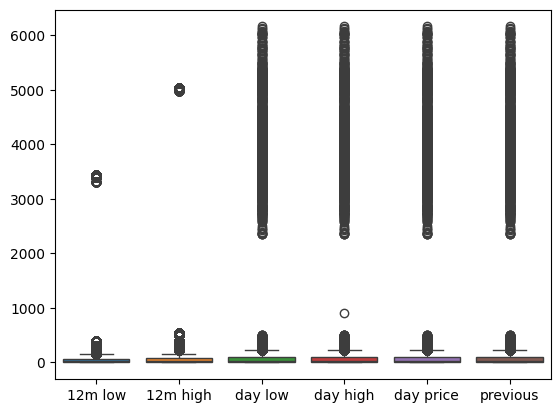

In [43]:
#check for outliers in the data
sns.boxplot(stocks_df2)
plt.show()

,12m low,12m high,day low,day high,day price,previous
count,80461.000000,80461.000000,80461.000000,80461.000000,80461.000000,80461.000000
mean,108.246193,175.315140,135.293503,136.690613,135.895813,135.929047
std,457.812592,675.631470,560.232605,560.218201,560.225830,560.352295
min,0.050000,0.050000,0.050000,0.050000,0.050000,0.000000
25%,9.800000,16.049999,13.000000,13.500000,13.300000,13.350000
50%,16.250000,26.500000,31.250000,32.250000,32.000000,32.000000
75%,45.000000,75.500000,94.500000,96.000000,95.000000,95.000000
max,3443.939941,5030.910156,6161.459961,6161.459961,6161.459961,6161.459961


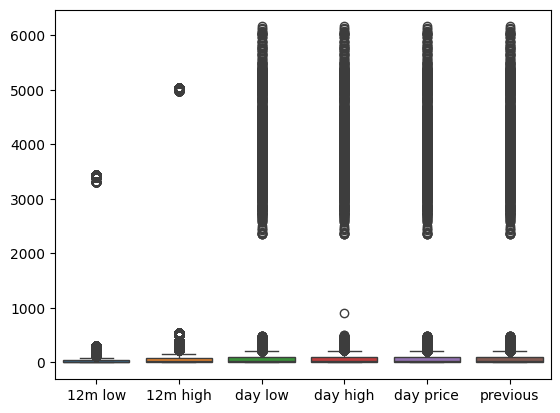

In [44]:
max_idx = stocks_df2["12m low"].argmax()
stocks_df2.iloc[max_idx] #display the row with the highest value in the 12m low column
stocks_df2 = stocks_df2[stocks_df2["name"] != "Limuru Tea"] 
stocks_df2
display(stocks_df2.describe()) 

sns.boxplot(stocks_df2)
plt.show()

(78981, 8)


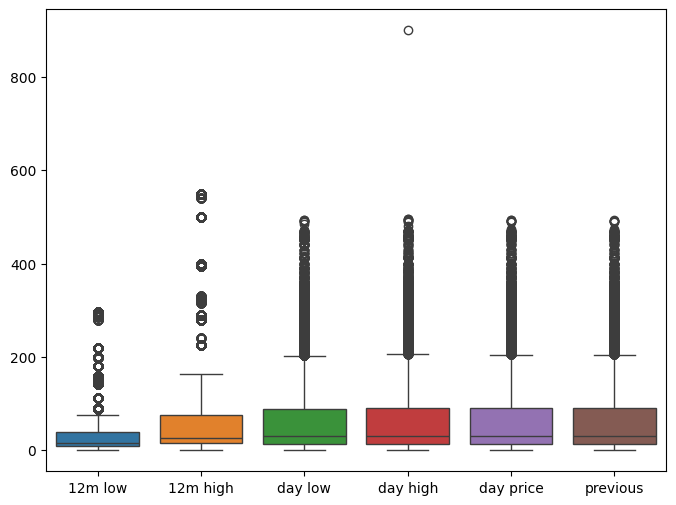

In [45]:
from scipy.stats import zscore
numerical_columns = ['12m low', '12m high', 'day low', 'day high', 'day price', "previous"]

# Compute Z-scores for numerical columns inorder to identify outliers
z_scores = stocks_df2[numerical_columns].apply(zscore)

# Filter out rows where Z-score exceeds threshold 
threshold = 3
stocks_df2_cleaned = stocks_df2[(z_scores.abs() < threshold).all(axis=1)]
print(stocks_df2_cleaned.shape)
plt.figure(figsize=(8,6))
sns.boxplot(stocks_df2_cleaned) # this visualizes the outliers in the data after removing them
plt.show()


In [46]:
stocks_df2_cleaned

,date,name,12m low,12m high,day low,day high,day price,previous
0,01/02/2007,Eaagads,22.0,57.0,52.0,52.0,52.0,52.00
1,01/02/2007,Kapchorua Tea,111.0,148.0,100.0,100.0,100.0,98.50
2,01/02/2007,Kakuzi,67.5,89.0,42.5,45.0,43.5,42.25
3,01/02/2007,Rea Vipingo Plantations,14.5,23.5,25.0,26.5,25.5,25.75
4,01/02/2007,Sasini Tea and Coffee,10.5,13.6,140.0,145.0,140.0,141.00
...,...,...,...,...,...,...,...,...
81498,12/31/2012,Sasini Tea and Coffee,10.5,13.6,11.7,12.0,11.7,11.70
81499,12/31/2012,Rea Vipingo Plantations,14.5,23.5,19.0,19.0,19.0,19.00
81501,12/31/2012,Kakuzi,67.5,89.0,72.0,72.0,72.0,69.00
81502,12/31/2012,Kapchorua Tea,111.0,148.0,118.0,118.0,118.0,118.00


In [47]:
#extract the date features from the dates
stocks_df2_cleaned["date"] = pd.to_datetime(stocks_df2_cleaned["date"])
stocks_df2_cleaned.info()


stocks_df2_cleaned.loc[:,"day"] = stocks_df2_cleaned["date"].dt.day
stocks_df2_cleaned.loc[:,"month"] = stocks_df2_cleaned["date"].dt.month
stocks_df2_cleaned.loc[:,"year"] = stocks_df2_cleaned["date"].dt.year
stocks_df2_cleaned.loc[:,"day of the week"] = stocks_df2_cleaned["date"].dt.day_of_week


stocks_df2_cleaned

<class 'pandas.core.frame.DataFrame'>
Index: 78981 entries, 0 to 81503
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       78981 non-null  datetime64[ns]
 1   name       78981 non-null  object        
 2   12m low    78981 non-null  float32       
 3   12m high   78981 non-null  float32       
 4   day low    78981 non-null  float32       
 5   day high   78981 non-null  float32       
 6   day price  78981 non-null  float32       
 7   previous   78981 non-null  float32       
dtypes: datetime64[ns](1), float32(6), object(1)
memory usage: 3.6+ MB


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4672\4156201715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df2_cleaned["date"] = pd.to_datetime(stocks_df2_cleaned["date"])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4672\4156201715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_df2_cleaned.loc[:,"day"] = stocks_df2_cleaned["date"].dt.day
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4672\4156201715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,date,name,12m low,12m high,day low,day high,day price,previous,day,month,year,day of the week
0,2007-01-02,Eaagads,22.0,57.0,52.0,52.0,52.0,52.00,2,1,2007,1
1,2007-01-02,Kapchorua Tea,111.0,148.0,100.0,100.0,100.0,98.50,2,1,2007,1
2,2007-01-02,Kakuzi,67.5,89.0,42.5,45.0,43.5,42.25,2,1,2007,1
3,2007-01-02,Rea Vipingo Plantations,14.5,23.5,25.0,26.5,25.5,25.75,2,1,2007,1
4,2007-01-02,Sasini Tea and Coffee,10.5,13.6,140.0,145.0,140.0,141.00,2,1,2007,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81498,2012-12-31,Sasini Tea and Coffee,10.5,13.6,11.7,12.0,11.7,11.70,31,12,2012,0
81499,2012-12-31,Rea Vipingo Plantations,14.5,23.5,19.0,19.0,19.0,19.00,31,12,2012,0
81501,2012-12-31,Kakuzi,67.5,89.0,72.0,72.0,72.0,69.00,31,12,2012,0
81502,2012-12-31,Kapchorua Tea,111.0,148.0,118.0,118.0,118.0,118.00,31,12,2012,0


### Train the model with data from a selected company

In [48]:
stocks_df2_cleaned.name.value_counts()

name
Housing Finance                         1501
Mumias Sugar                            1501
Eveready East Africa                    1501
KenGen                                  1501
Kenya Commercial Bank                   1501
                                        ... 
Kenya Airways (Rights)                    10
Diamond Trust Bank Kenya (Rights)         10
NIC Bank (Rights)                          9
Kenya Commercial Bank (Rights)             8
TPS Eastern Africa (Serena) (Rights)       6
Name: count, Length: 70, dtype: int64

Text(0.5, 1.0, 'Day price of East African Breweries over time')

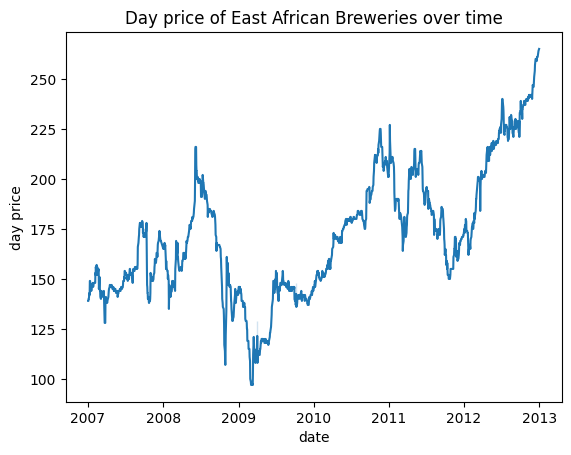

In [49]:
company = "East African Breweries"
stock_data = stocks_df2_cleaned[stocks_df2_cleaned["name"] ==  company]
stock_data.head()

sns.lineplot(x = "date",y = "day price", data=stock_data)
plt.title(f"Day price of {company} over time")

In [50]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

X = stock_data[['12m low', '12m high', 'day low', 'day high', 'previous', 'day', 'month', 'year', 'day of the week']].values
y = stock_data["day price"].values

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Score for RandomForestRegressor: 0.997783050852248
Score for KNN: 0.9971267580986023
Score for LinearRegression: 0.998090120918468
Score for xgboost: 0.9965329170227051


Text(0, 0.5, 'Scores')

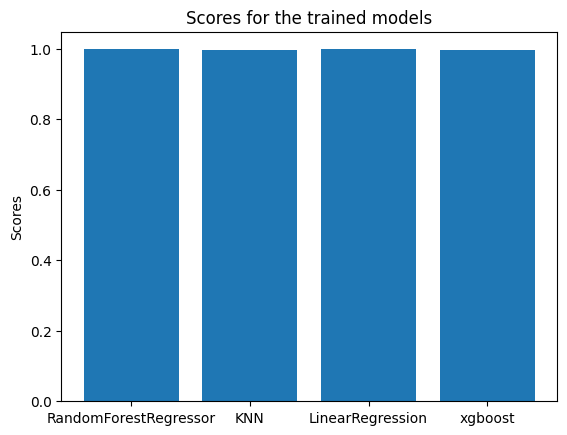

In [115]:
models = {
    "RandomForestRegressor" : RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "LinearRegression":LinearRegression(),
    "xgboost":xgb.XGBRegressor(n_estimators = 100, random_state = 42)
}
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    #make predictions
    model.predict(X_test)
    #evaluate performance
    score = model.score(X_test, y_test)
    scores[name] = score
    print(f"Score for {name}: {score}")
# plot the results
plt.bar(scores.keys(),list(scores.values()))
plt.title("Scores for the trained models")
plt.ylabel("Scores")


           Feature  Importance
3         day high    0.750237
2          day low    0.206342
4         previous    0.042733
5              day    0.000281
6            month    0.000197
8  day of the week    0.000129
7             year    0.000077
0          12m low    0.000003
1         12m high    0.000000


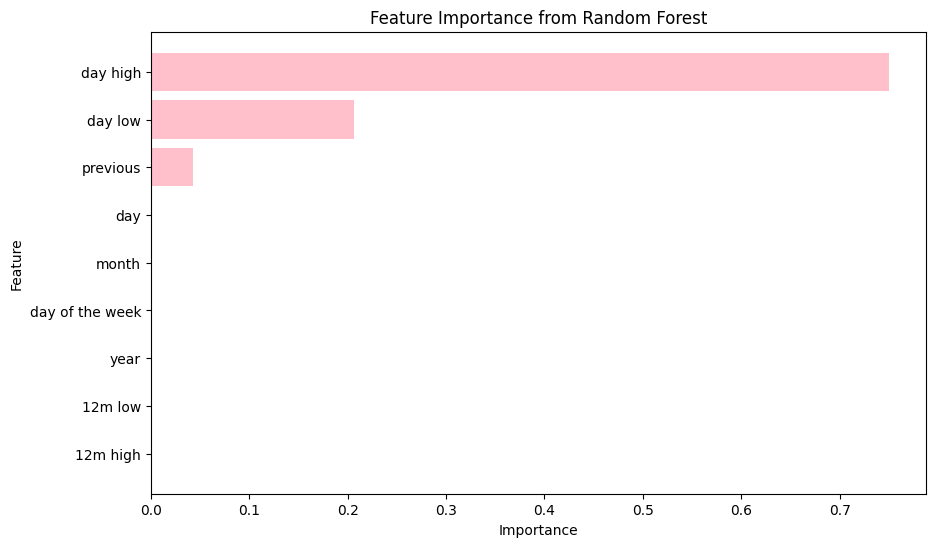

In [116]:
#get the important features when using the random forest regressor inorder to determine the most important features and drop the least important ones. In this way, we can improve the model's performance
rf = models.get("RandomForestRegressor")
importances = rf.feature_importances_ 

features = ['12m low', '12m high', 'day low', 'day high', 'previous', 'day', 'month', 'year', 'day of the week']

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False) # we sort the values in descending order to get the most important features first

# Display feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='pink')
plt.gca().invert_yaxis()  # Higher importance on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


In [117]:
selected_features = feature_importance_df["Feature"].iloc[:3]

In [124]:
#train the model on the important features
important_features = stock_data[selected_features].values
X_train_selected, X_test_selected, y_train, y_test = train_test_split(important_features, y, test_size=0.2, random_state=42)
#train the model
rf.fit(X_train_selected, y_train)
#make predicitons
predictions = rf.predict(X_test_selected)
rf_score = rf.score(X_test_selected, y_test)
print(rf_score)



0.9977383528287586


## Model Evaluation

In [119]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score, mean_squared_error
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)


print(f"mae: {mae}")
print(f"mape:{mape}")
print(f"rmse:{rmse}")
print(f"r2:{r2}")
print(f"mse:{mse}")


mae: 0.9599688359788373
mape:0.005770942703289803
rmse:1.516880326992654
r2:0.9977383528287586
mse:2.300925926417341


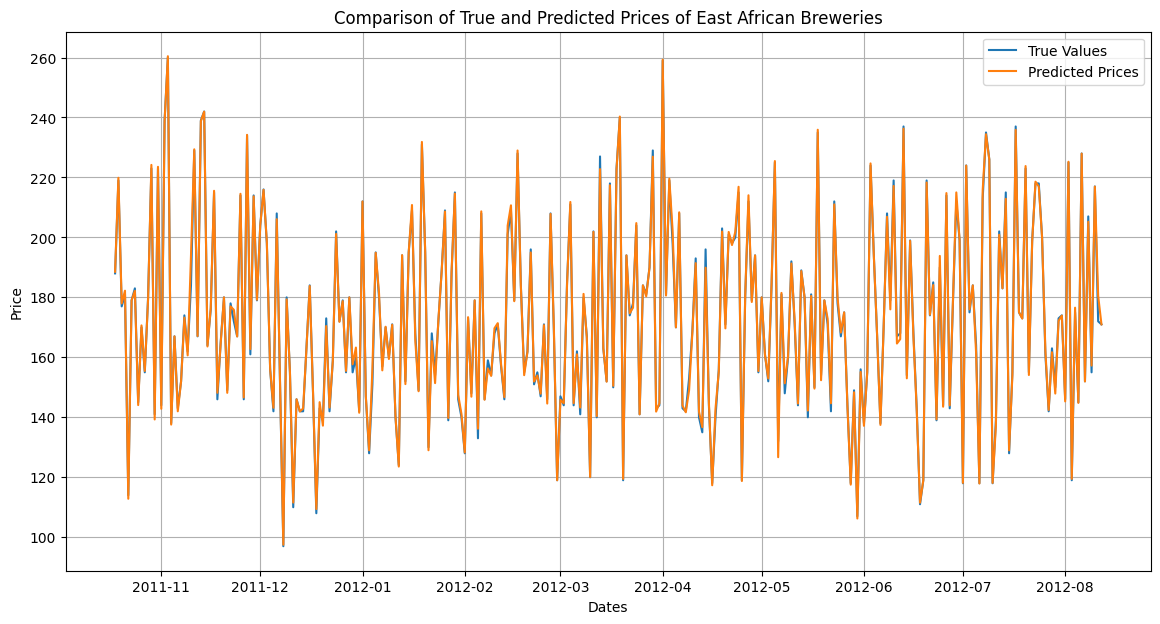

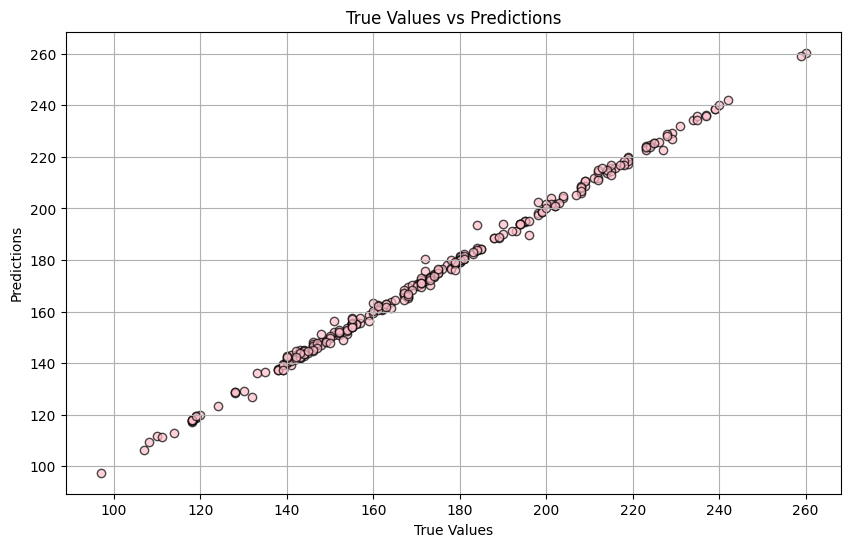

In [134]:
# Create a DataFrame with test data
num = X_test_selected.shape[0]

dates = pd.date_range("2011-10-18", periods=num)
predictions_df = pd.DataFrame({
    "Dates": dates,
    "True Values": y_test,
    "Predicted Prices": predictions
})

# Plot the true and predicted values
plt.figure(figsize=(14, 7))
sns.lineplot(x="Dates", y="True Values", data=predictions_df, label="True Values")
sns.lineplot(x="Dates", y="Predicted Prices", data=predictions_df, label="Predicted Prices")
plt.title(f"Comparison of True and Predicted Prices of {company}")
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# to show another visualization of the true and predicted values of the stock prices we can use a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='pink', edgecolors='black', alpha=0.7)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.grid(True)


plt.show()


In [130]:
#save the model
import joblib
joblib.dump(rf, "stocks.pkl")

['stocks.pkl']